# Comparing Clustering Algorithms

In this notebook, I'll change the number of blobs and their density to see the performance of three clustering algorithms and their predictions in different scenarios.

For all three methods, I'll be using differently simulated datasets, five "blobs."  We won't need to normalize the data since it is simulated and comes pre-normalized, but with real data normalization will be important to make sure all the features are given equal weight in finding a clustering solution.

In [116]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import SpectralClustering, KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

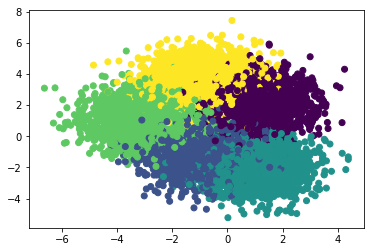

In [117]:
# The coordinates of the centers of our blobs.
centers = [[1, 2], [-1, -1], [1, -2], [-3, 1], [-1, 3.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

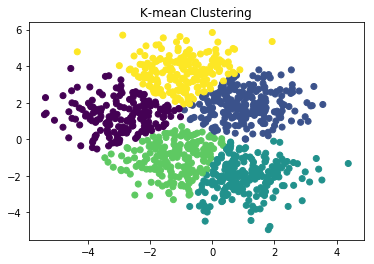

K_MEANS Comparing clusters against the data:
col_0    0    1    2    3    4
row_0                         
0        2   10    0  157   13
1      191    7    2    4   16
2        1   34  169    0    0
3        4  152   20   18    0
4       23    0    0    8  169


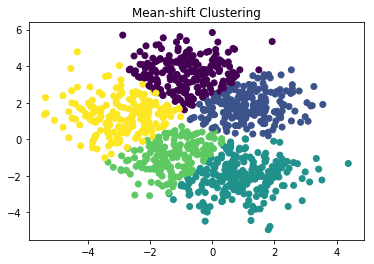

Number of estimated clusters: 5
Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0       36  176    3    4    2
1        1    5   49  137   11
2        0    2  177   12    0
3        6    3    0   14  164
4      171   10    0    0   17


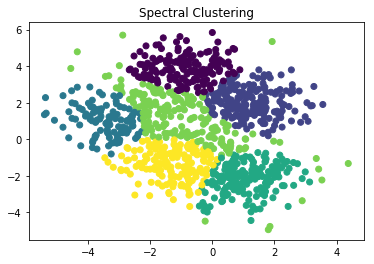

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3   4    5
row_0                             
0       18  172    0    0  31    0
1        0    1    5   19  45  133
2        0    2    0  154  18   17
3        2    1  108    0  61   15
4      146   12    1    0  39    0


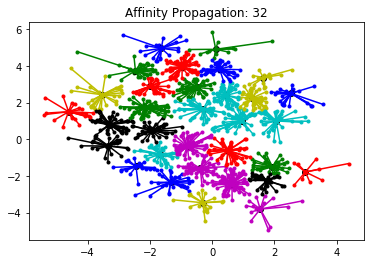

In [119]:
"""K-MEAN CLUSTERING"""
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-mean Clustering')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))


"""MEAN-SHIFT CLUSTERING"""
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean-shift Clustering')
plt.show()

print("Number of estimated clusters: {}".format(n_clusters_))
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


"""SPECTRAL CLUSTERING"""
# We know we're looking for three clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


"""AFFINITY PROPAGATION CLUSTERING"""

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_


from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propagation: {}'.format(n_clusters_))
plt.show()


Pretty good performance. In this situation with 5 clusters, spectral clustering shows better performance with identifying more data points for each cluster correctly. Affinity propagation is known to overestimate the number of clusters.

# Less density?

Now, I want to change the distance between centers and make them less closer to each other. This will shape data points to gather around their centroid separate clusters better. 
I'll increase the distance between centers 5 times and test the clustering methods.

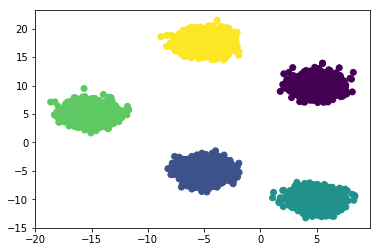

In [110]:
centers = np.array(centers)
centers_less_density = centers*5

X, y = make_blobs(
    n_samples=10000,
    centers=centers_less_density,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

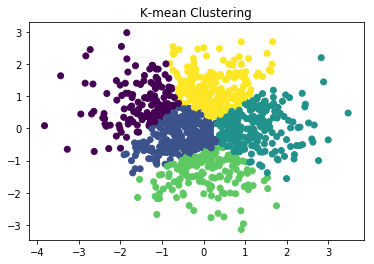

K_MEANS Comparing clusters against the data:
col_0   0   1   2   3   4
row_0                    
0      27  20  16  36  36
1      59  58  52  48  47
2      61  40  55  37  34
3      26  47  46  25  16
4      48  38  22  41  65
Number of estimated clusters: 4


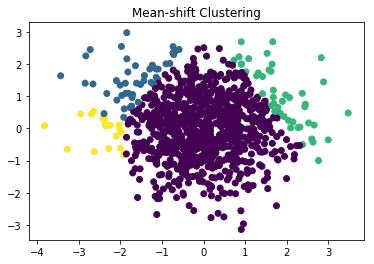

Comparing the assigned categories to the ones in the data:
col_0    0   1   2  3
row_0                
0      195  12  12  2
1      186   7   6  4
2      173   4  10  4
3      163  11   8  5
4      173  12   9  4


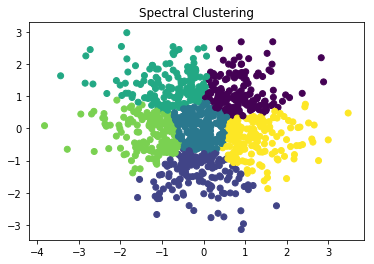

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5
row_0                        
0      39  22  59  34  24  43
1      28  42  41  23  33  36
2      17  43  45  15  25  46
3      36  23  39  33  34  22
4      48  16  38  45  35  16
Done


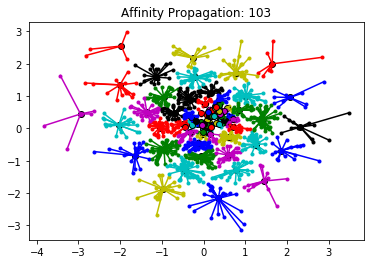

In [115]:
"""K-MEAN CLUSTERING"""
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-mean Clustering')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))


"""MEAN-SHIFT CLUSTERING"""
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean-shift Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


"""SPECTRAL CLUSTERING"""
# We know we're looking for three clusters.
n_clusters=6

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


"""AFFINITY PROPAGATION CLUSTERING"""

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propagation: {}'.format(n_clusters_))
plt.show()


With the less closer centers – in this case,  Affinity Propogation has an absolutely absurd number of cluster.  K-mean and Mean-shift work perfectly. Spectral clustering has 92 misclassifications

# More density

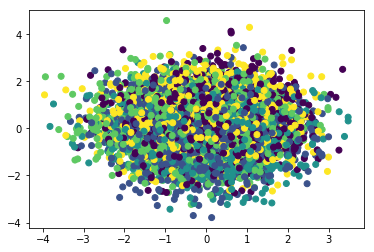

In [112]:
centers = np.array(centers)
centers_normal_density = centers/10

X, y = make_blobs(
    n_samples=10000,
    centers=centers_normal_density,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

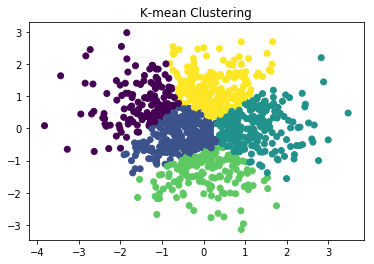

K_MEANS Comparing clusters against the data:
col_0   0   1   2   3   4
row_0                    
0      27  20  16  36  36
1      59  58  52  48  47
2      61  40  55  37  34
3      26  47  46  25  16
4      48  38  22  41  65


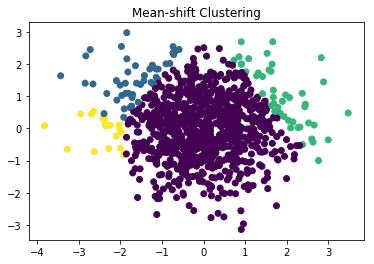

Number of estimated clusters: 4
Comparing the assigned categories to the ones in the data:
col_0    0   1   2  3
row_0                
0      195  12  12  2
1      186   7   6  4
2      173   4  10  4
3      163  11   8  5
4      173  12   9  4


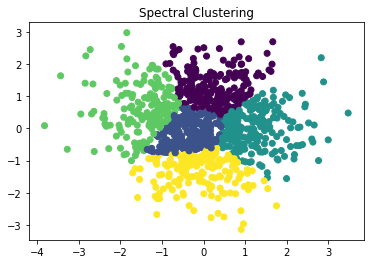

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4
row_0                    
0      46  55  61  32  27
1      33  53  42  29  46
2      21  48  52  20  50
3      40  39  36  43  29
4      65  40  32  42  19
Done
Estimated number of clusters: 103


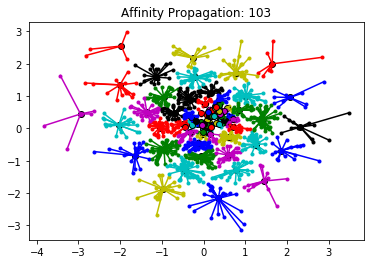

In [114]:
"""K-MEAN CLUSTERING"""
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('K-mean Clustering')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))

"""MEAN-SHIFT CLUSTERING"""
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean-shift Clustering')
plt.show()

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))


"""SPECTRAL CLUSTERING"""
# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))


"""AFFINITY PROPAGATION CLUSTERING"""

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propagation: {}'.format(n_clusters_))
plt.show()


With the messy distribution of data points in clusters, K-means is still good, but mean-shift is not performing well (defines 4 clusters), as long as I don't tune the quantile parameter to estimate the bandwidth. Spectral clustering, however, defines clusters better and we can observe very similar clustering to original clusters before increasing the density.

# Conclusion
Above demontraited calculations shows that each clustering method can perform better than the rest in certain circumstances. The advantage of Mean-shift is that it does not require the number of clusters as KMeans and Spectral clustering, and still defines the number of clusters if the optimal bandwidth is found. 
Also, I observe that the correlation between the density of cluster centers and the number of clusters defined by Affinity Propagation algorithm is negative. The more density, the less clusters.